# Titanic Data Set - Statistics Review

[Variable Descriptions](https://www.kaggle.com/c/titanic/data).

**Describe the data. **
- How big?
- What are the columns and what do they mean?

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

titanic_df = pd.read_csv("titanic.csv")
print(titanic_df.describe())
print(titanic_df.shape)
print(titanic_df.dtypes)
print(titanic_df.head())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Na

**What’s the average age of:**

- Any Titanic passenger
- A survivor
- A non-surviving first-class passenger
- Male survivors older than 30 from anywhere but Queenstown

In [33]:
#print('Average age of any Titanic passenger: ', titanic_df['Age'].mean())
#print('Average age any surviving Titanic passenger: ', titanic_df.Age[titanic_df['Survived'] == 1].mean())
#print('Average age of non-surviving first-class passenger: ', titanic_df.Age[[titanic_df['Survived']==0], [titanic_df['Pclass']==1]])

In [53]:
#pred is short for predicate, which evaluates an expression as True or False. 

pred_survived = titanic_df['Survived'] == 1  
pred_1stclass = titanic_df['Pclass'] == 1
pred_male = titanic_df['Sex'] == 'male'

#create various data frames that are based on our predicates, i.e. the surv data frame shows all the data where survived = 1
surv = titanic_df[pred_survived]
nonsurv_1stcl = titanic_df[~(pred_survived) & (pred_1stclass)]  # '~' means 'not'
male_surv_30 = surv[(pred_male) & (surv['Age'] > 30) & (surv['Embarked'] != 'Q')]

avg_ages = pd.Series([titanic_df['Age'].mean(),
                     surv['Age'].mean(),
                     nonsurv_1stcl['Age'].mean(),
                     male_surv_30['Age'].mean()])

avg_ages.index = ['Any Titanic Passenger', 'A Survivor', 'A Non-surviving 1st Class Passenger',
                 'Male Survivors older than 30 from Anywhere but Queenstown']

avg_ages


/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Any Titanic Passenger                                        29.699118
A Survivor                                                   28.343690
A Non-surviving 1st Class Passenger                          43.695312
Male Survivors older than 30 from Anywhere but Queenstown    41.487805
dtype: float64

**For the groups from the previous task, how far (in years) are the average ages from the median ages?**

In [54]:
median_ages = pd.Series([titanic_df['Age'].median(),
                     surv['Age'].median(),
                     nonsurv_1stcl['Age'].median(),
                     male_surv_30['Age'].median()])

median_ages.index = ['Any Titanic Passenger', 'A Survivor', 'A Non-surviving 1st Class Passenger',
                 'Male Survivors older than 30 from Anywhere but Queenstown']
median_ages - avg_ages

Any Titanic Passenger                                       -1.699118
A Survivor                                                  -0.343690
A Non-surviving 1st Class Passenger                          1.554688
Male Survivors older than 30 from Anywhere but Queenstown   -3.487805
dtype: float64

**What’s the most common:**
- Passenger class
- Port of Embarkation
- Number of siblings or spouses aboard for survivors

In [84]:
ports = {'C': 'Cherbourg',
         'Q': 'Queenstown',
         'S': 'Southampton'}

common = pd.DataFrame([titanic_df['Pclass'].mode(),
                   titanic_df['Embarked'].mode().map(ports),
                   surv['SibSp'].mode()])
common.index = ['Passenger Class', 'Port of Embarkation', 'Number of Siblings/Spouses Aboard for Survivors']
common

,0
Passenger Class,3
Port of Embarkation,Southampton
Number of Siblings/Spouses Aboard for Survivors,0


**Within what range of standard deviations from the mean (0-1, 1-2, 2-3) is the median ticket price? Is it above or below the mean?**

In [85]:
fares = titanic_df['Fare']
median_z = (fares.median() - fares.mean()) / fares.std()
median_z
#the range is between 0 and 1. Since z-score is negative, the median is below the mean

-0.3571902456652297

**How much more expensive was the 90th percentile ticket than the 5th percentile ticket? Are they the same class?**

In [75]:
fares.quantile(0.9) - fares.quantile(0.05)

70.7333

In [76]:
sort_fare = titanic_df.sort_values(['Fare'])

def perc_ticket(percentile):
    index = len(sort_fare) * percentile // 100
    return sort_fare.iloc[index]

assert fares.quantile(0.9) == perc_ticket(90)['Fare']

print('Ticket class of 90th percentile: ', perc_ticket(90)['Pclass'])
print('Ticket class of 5th percentile: ', perc_ticket(5)['Pclass'])

Ticket class of 90th percentile:  1
Ticket class of 5th percentile:  3


**The highest average ticket price was paid by passengers from which port? Null ports don’t count.**

In [88]:
fares_port = pd.pivot_table(titanic_df, columns='Embarked', values='Fare')
#a pivot table creates a Series
fares_port

Embarked,C,Q,S
Fare,59.954144,13.27603,27.079812


In [94]:
fares_port.index = pd.Series(fares_port.index).map(ports)
ports[fares_port.idxmax()]


TypeError: 'Series' objects are mutable, thus they cannot be hashed

**What is the most common passenger class for each port?**

In [91]:
import scipy.stats as stats

class_mode_port = pd.pivot_table(titanic_df, columns='Embarked', values='Pclass', aggfunc=stats.mode)
class_mode_port.index = pd.Series(class_mode_port.index).map(ports)
class_mode_port

Embarked,C,Q,S
NaN,"([1], [85])","([3], [72])","([3], [353])"


**What fraction of surviving 1st-class males paid lower than double the overall median ticket price?**

In [102]:
median_fare = titanic_df['Fare'].median()

#create a new data frame from the previously created predicates
surv_1st_male = titanic_df[(pred_survived) & (pred_1stclass) & (pred_male)]

#create a data frame that just shows 1st class males with a fare less than twice the median fare
paid_lower = surv_1st_male[surv_1st_male['Fare'] < median_fare * 2]

#divide number of rows (i.e. count) of 1st class survived males that paid less than twice median fare by total 1st 
#class survived males
len(paid_lower) / len(surv_1st_male)


0.24444444444444444

**How much older/younger was the average surviving passenger with family members than the average non-surviving passenger without them?**

In [116]:
#titanic_df.head()
#create new predicate (true/false column) that shows passengers with family members

pred_family = (titanic_df['SibSp'] > 0) | (titanic_df['Parch'] > 0)


#create data frame of survivors with family members using previously created data frame (surv) which shows only survivors
surv_family = surv[pred_family]

#calculate average age from previously created data frame
sur_fam_avg_age = surv_family['Age'].mean()

#create data frame of non-survivors without family
nonsurv_nofam = titanic_df[~(pred_family) & ~(pred_survived)]

nonsurv_nofam_avg_age = nonsurv_nofam['Age'].mean()

sur_fam_avg_age - nonsurv_nofam_avg_age

#surv = titanic_df[pred_survived]
#nonsurv_1stcl = titanic_df[~(pred_survived) & (pred_1stclass)]  # '~' means 'not'
#male_surv_30 = surv[(pred_male) & (surv['Age'] > 30) & (surv['Embarked'] != 'Q')]



/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


-6.888171076642337

**Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles.**
- To be clearer, what I want is for you to specify 20 quantiles, and for each of those quantiles divide the number of survivors in that quantile by the total number of people in that quantile. That’ll give you the survival rate in that quantile.
- Then plot a line of the survival rate against the ticket fare quantiles.
- Make sure you label your axes.

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


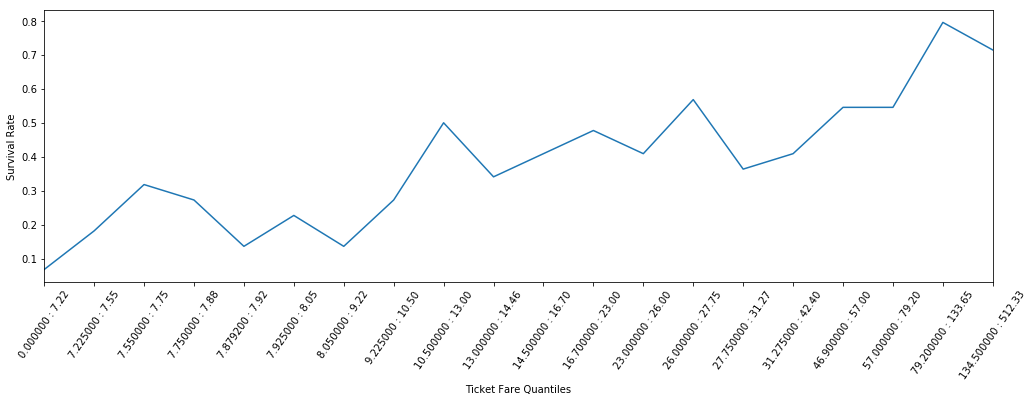

In [126]:
%matplotlib inline
import math

#count number of total passengers using sort_fares data frame previously created
total_passengers = len(sort_fare)
#print(total_passengers)
#quantiles to be used
quantiles = 20

#divide quantiles to be used by total passengers (use math.ceil to roundup) so you know how many passengers
# belong in each quantile
pass_per_quant = math.ceil(total_passengers / quantiles)

#create empty series
surv_rate_quant = pd.Series()

for i in range(0, total_passengers, pass_per_quant):
    #end = i+pass_per_quant-1 if i+pass_per_quant < total_passengers else total_passengers-1
    if i+pass_per_quant < total_passengers:
        end = i+pass_per_quant-1
    else:
        end = total_passengers-1
    quant = sort_fare.iloc[i:end]
    surv_rate = len(quant[pred_survived]) / len(quant)
    label = '{:2f} : {:.2f}'.format(sort_fare.iloc[i]['Fare'],
                                    sort_fare.iloc[end]['Fare'])
    surv_rate_quant[label] = surv_rate

ax = surv_rate_quant.plot(figsize=(17,5), xticks=range(0,20), rot=55)   
ax.set_xlabel('Ticket Fare Quantiles')
ax.set_ylabel('Survival Rate')

**For each of the following characteristics, find the median in the data:**
- Age
- Ticket price
- Siblings/spouses
- Parents/children

In [129]:
median_age = titanic_df['Age'].median()
median_fare = titanic_df['Fare'].median()
median_sibsp = titanic_df['SibSp'].median()
median_parch = titanic_df['Parch'].median()

print('Median Age: ', median_age, '\n',
      'Median Ticket Price: ', median_fare, '\n',
      'Median Siblings/Spouses: ', median_sibsp, '\n',
      'Median Parents/children: ', median_parch)

#create a series
medians = pd.Series()
medians['Age'] = titanic_df['Age'].median()
medians['Ticket Price'] = titanic_df['Fare'].median()
medians['Siblings/spouses'] = titanic_df['SibSp'].median()
medians['Parents/Children'] = titanic_df['Parch'].median()
medians


Median Age:  28.0 
 Median Ticket Price:  14.4542 
 Median Siblings/Spouses:  0.0 
 Median Parents/children:  0.0


Age                 28.0000
Ticket Price        14.4542
Siblings/spouses     0.0000
Parents/Children     0.0000
dtype: float64

**If you were to use these medians to draw numerical boundaries separating survivors from non-survivors, which of these characteristics would be the best choice and why?**

In [134]:
#create 2 series, one shows survival rate below/at median, one that shows survival rate above median
below_at_median = pd.Series(name='Survivors below/at median')
above_median = pd.Series(name='Survivors above median')

#create function that calculates survival ratio 
def surv_ratio(predicate):
    series = titanic_df[predicate]
    return len(series[series['Survived'] == True]) / len(series)

#fill in the previously created empty series with the appropriate data using survival ratio function 
below_at_median['Age'] = surv_ratio(titanic_df['Age'] <= medians['Age'])
below_at_median['Ticket Price'] = surv_ratio(titanic_df['Fare'] <= medians['Ticket Price'])
below_at_median['Siblings/spouses'] = surv_ratio(titanic_df['SibSp'] == medians['Siblings/spouses'])
below_at_median['Parents/Children'] = surv_ratio(titanic_df['Parch'] == medians['Parents/Children'])

above_median['Age'] = surv_ratio(titanic_df['Age'] > medians['Age'])
above_median['Ticket Price'] = surv_ratio(titanic_df['Fare'] > medians['Ticket Price'])
above_median['Siblings/spouses'] = surv_ratio(titanic_df['SibSp'] > medians['Siblings/spouses'])
above_median['Parents/children'] = surv_ratio(titanic_df['Parch'] > medians['Parents/Children'])

survival_median = pd.DataFrame([below_at_median, above_median],
                              columns=['Age', 'Ticket Price', 'Siblings/Spouses', 'Parents/children']).transpose()

survival_median['Survivors Above Median - Survivors Below/At Median'] = above_median - below_at_median
survival_median

#passengers with ticket prices above the median have their odds of survival increased by 26 percentage points
# when compared to passengers who have ticket prices below the median. This is the best choice to draw a 
# numerical boundary between survivors and non-survivors

,Survivors below/at median,Survivors above median,Survivors Above Median - Survivors Below/At Median
Age,0.408840,0.403409,-0.005431
Ticket Price,0.250559,0.518018,0.267459
Siblings/Spouses,NaN,NaN,NaN
Parents/children,NaN,0.511737,NaN


**Plot the distribution of passenger ages. Choose visually-meaningful bin sizes and label your axes.**

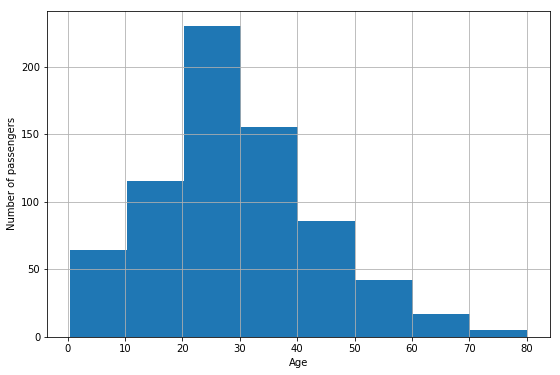

In [135]:
ax = titanic_df['Age'].hist(figsize=(9, 6), bins=8)
ax.set_xlabel('Age')
ax.set_ylabel('Number of passengers')

ax

**Find the probability that:**
- A passenger survived
- A passenger was male
- A passenger was female and had at least one sibling or spouse on board
- A survivor was from Cherbourg
- A passenger was less than 10 years old
- A passenger was between 25 and 40 years old
- A passenger was either younger than 20 years old or older than 50

In [138]:
#create function that calculates probability of an event based on a predicate, i.e. take total true from 
# predicate and divide by total passengers
def calc_prob(predicate):
    return len(titanic_df[predicate]) / len(titanic_df)

#create empty series and add the various predicates to that series
probs = pd.Series()
probs['Survived'] = calc_prob(pred_survived)
probs['Male'] = calc_prob(pred_male)
probs['Female with siblings/spouse'] = calc_prob(~(pred_male) & (titanic_df['SibSp'] > 0))
probs['Survivor from Cherbourg'] = calc_prob(pred_survived & (titanic_df['Embarked'] == 'C'))
probs['Passenger Age < 10'] = calc_prob(titanic_df['Age'] < 10)
probs['Passenger Age Between 25 & 40'] = calc_prob((titanic_df['Age'] < 40) & (titanic_df['Age'] > 25))
probs['Passenger Younger than 20 or older than 50'] = calc_prob((titanic_df['Age'] < 20) | (titanic_df['Age'] > 50))
probs

Survived                                      0.383838
Male                                          0.647587
Female with siblings/spouse                   0.157127
Survivor from Cherbourg                       0.104377
Passenger Age < 10                            0.069585
Passenger Age Between 25 & 40                 0.280584
Passenger Younger than 20 or older than 50    0.255892
dtype: float64

**Knowing nothing else about the passengers aside from the survival rate of the population (see question above), if I choose 100 passengers at random from the passenger list, what’s the probability that exactly 42 passengers survive?**

In [140]:
#use binomial distribution which is designed to model number of successes in a sample given the probablity 
#of successes in a population

stats.binom.pmf(k=42, n=100, p=probs['Survived'])

0.061330411815167886

**What’s the probability that at least 42 of those 100 passengers survive?**

In [144]:
#for AT LEAST, use cumulative distribution function
p_41orless = stats.binom.cdf(k=41, n=100, p=probs['Survived'])
p_atleast42 = 1 - p_41orless
p_atleast42

0.25940724207261701

**Take random samples of 100 passengers and find out how many you need before the fraction of those samples where at least 42 passengers survive matches the probability you calculated previously (within Δp≈0.05).**

Answers will vary based on chosen seeds. What would happen if you drew every sample with the same seed?

Plot the survival fraction vs the number of random samples.

In [147]:
#store pertinent data in data frame
samples = pd.DataFrame(index=['n_survivors', 'at_least42', 'cum_fraction'])
cum_fraction = 0 

seed = 7
_iter = 1
while abs(cum_fraction - p_atleast42) >= 0.05:
    sample = titanic_df.sample(n=100, random_state=seed)
    n_survivors = sample['Survived'].sum()
    at_least42 = n_survivors >= 42
    n_prev_successes = samples.transpose()['at_least42'].sum()
    cum_fraction = (at_least42 + n_prev_successes) / (1 + len(samples.columns))
    samples[_iter] = [n_survivors, at_least42, cum_fraction]
    _iter = _iter + 1
    seed = seed + 7

print('{} samples were needed to get a fraction of {}.'.format(_iter-1, cum_fraction))

samples = samples.transpose()
samples.index.names = ['samples_number']
samples


9 samples were needed to get a fraction of 0.2222222222222222.


,n_survivors,at_least42,cum_fraction
samples_number,,,
1,35,False,0
2,33,False,0
3,40,False,0
4,36,False,0
5,42,True,0.2
6,40,False,0.166667
7,37,False,0.142857
8,37,False,0.125
9,43,True,0.222222


**Is there a statistically significant difference between:**
- The ages of male and female survivors?
- The fares paid by passengers from Queenstown and the passengers from Cherbourg?

**Use a 95% confidence level.**

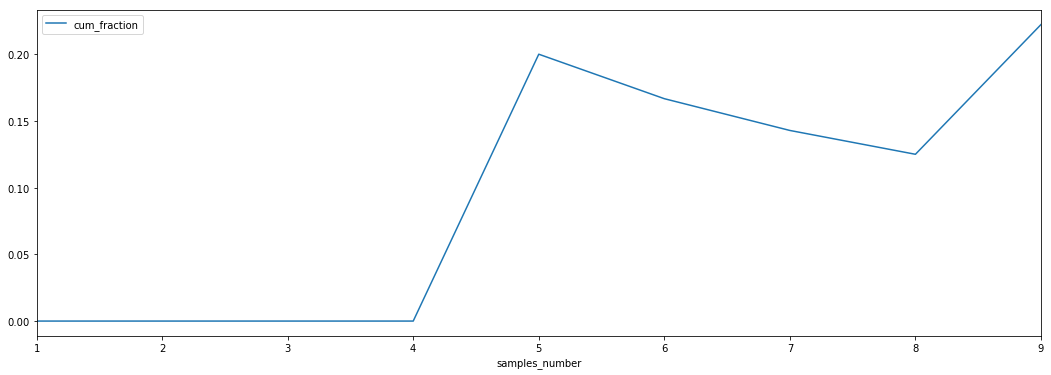

In [148]:
ax = samples.plot(y='cum_fraction', figsize=(18, 6))

In [149]:
surv_age_not_null = surv.dropna(subset=['Age'])
surv_male_ages = surv_age_not_null[pred_male]['Age']
surv_female_ages = surv_age_not_null[~(pred_male)]['Age']

stats.ttest_ind(a=surv_male_ages, b=surv_female_ages, equal_var=False) #2 sided test, assuming var is same 

/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/nick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Ttest_indResult(statistic=-0.79089662277024664, pvalue=0.43018823932007377)

In [ ]:
#p value is large so there is not a stat sig different between male and female survivor ages

In [151]:
q_fares = titanic_df[titanic_df['Embarked'] == 'Q']['Fare']
c_fares = titanic_df[titanic_df['Embarked'] == 'C']['Fare']

stats.ttest_ind(a=q_fares, b=c_fares, equal_var=False)
#since p value is lower than 5%, we can say that we are 95% confident that the fares paid by these 2 groups are
#statistically different

Ttest_indResult(statistic=-6.9951971047186809, pvalue=4.5792033919567422e-11)

**Accompany your p-values with histograms showing the distributions of both compared populations.**

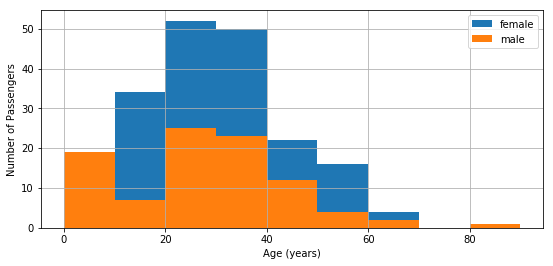

In [152]:
bins0_100 = range(0, 100, 10)
ax = surv_female_ages.hist(bins=bins0_100, label='female', figsize=(9, 4))
ax = surv_male_ages.hist(bins=bins0_100, label='male', ax=ax)
ax.legend()
ax.set_xlabel('Age (years)')
ax.set_ylabel('Number of Passengers')


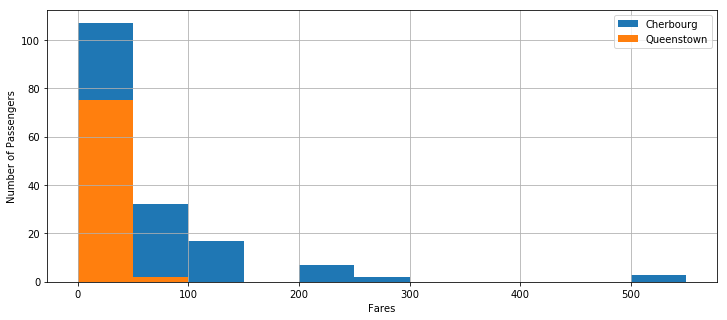

In [153]:
bins0_600 = range(0, 600, 50)
ax = c_fares.hist(bins=bins0_600, label='Cherbourg', figsize=(12, 5))
ax = q_fares.hist(bins=bins0_600, label='Queenstown', ax=ax)
ax.legend()
ax.set_xlabel('Fares')
ax.set_ylabel('Number of Passengers')

**Did survivors pay more for their tickets than those that did not? Use a 95% confidence level.**

In [157]:
surv_fares = surv['Fare']
nonsurv_fares = titanic_df[~(pred_survived)]['Fare']

print(surv_fares.mean() - nonsurv_fares.mean())

two_sided_ttest = stats.ttest_ind(a=surv_fares, b=nonsurv_fares, equal_var=False)

print('t-stat', two_sided_ttest.statistic)
print('one-sided p-value', two_sided_ttest.pvalue/2)
#result is smaller than 5%, so we can say with a 95% confidence level that survivors did pay more for their tickets 
# than non-survivors

26.277520717093292
t-stat 6.83909925909
one-sided p-value 1.34966617516e-11


**Did a given first-class passenger have fewer family members on board than a given third-class passenger? Use a 95% confidence level.**

In [159]:
first_class = titanic_df[pred_1stclass]
third_class = titanic_df[titanic_df['Pclass'] == 3]

fam_1stclass = first_class['SibSp'] + first_class['Parch']
fam_3rdclass = third_class['SibSp'] + third_class['Parch']

print(fam_1stclass.mean() - fam_3rdclass.mean())

two_sided_ttest = stats.ttest_ind(a=fam_1stclass, b=fam_3rdclass, equal_var=False)

print('t-stat = ', two_sided_ttest.statistic)
print('one-sided p-value = ', two_sided_ttest.pvalue/2)

#smaller than 5%, we are 95% conf that 1st class passengers had fewer family members than 3rd class passengers

-0.2349984913630534
t-stat =  -2.07990757489
one-sided p-value =  0.0189536928743
